In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_path = 'merged_tracks.csv'  # Change this to your file path
data = pd.read_csv(file_path)

In [8]:
social_media_metrics = [
    "streams", "Spotify Streams", "YouTube Views", "YouTube Likes",
    "TikTok Posts", "TikTok Likes", "TikTok Views"
]

In [9]:
for col in social_media_metrics:
    if col in data.columns:
        data[col] = data[col].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

In [10]:
audio_features = [
    "bpm", "danceability_%", "valence_%", "energy_%",
    "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"
]

In [11]:
relevant_columns = audio_features + social_media_metrics

In [12]:
descriptive_stats = data[relevant_columns].describe().T
descriptive_stats["range"] = descriptive_stats["max"] - descriptive_stats["min"]
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
                    count          mean           std      min           25%  \
bpm                 766.0  1.242415e+02  2.882601e+01     65.0  1.000000e+02   
danceability_%      766.0  6.828982e+01  1.369279e+01     25.0  5.900000e+01   
valence_%           766.0  5.221410e+01  2.288873e+01      4.0  3.425000e+01   
energy_%            766.0  6.501305e+01  1.537674e+01      9.0  5.500000e+01   
acousticness_%      766.0  2.515796e+01  2.451570e+01      0.0  5.000000e+00   
instrumentalness_%  766.0  1.389034e+00  7.904832e+00      0.0  0.000000e+00   
liveness_%          766.0  1.774021e+01  1.286010e+01      3.0  9.000000e+00   
speechiness_%       766.0  1.023629e+01  9.905978e+00      2.0  4.000000e+00   
streams             766.0  6.089298e+08  6.263782e+08   2762.0  1.848541e+08   
Spotify Streams     764.0  8.049027e+08  7.282843e+08   2307.0  2.928320e+08   
YouTube Views       731.0  4.355603e+08  7.020581e+08  83446.0  8.887018e+07   
YouTube Likes   

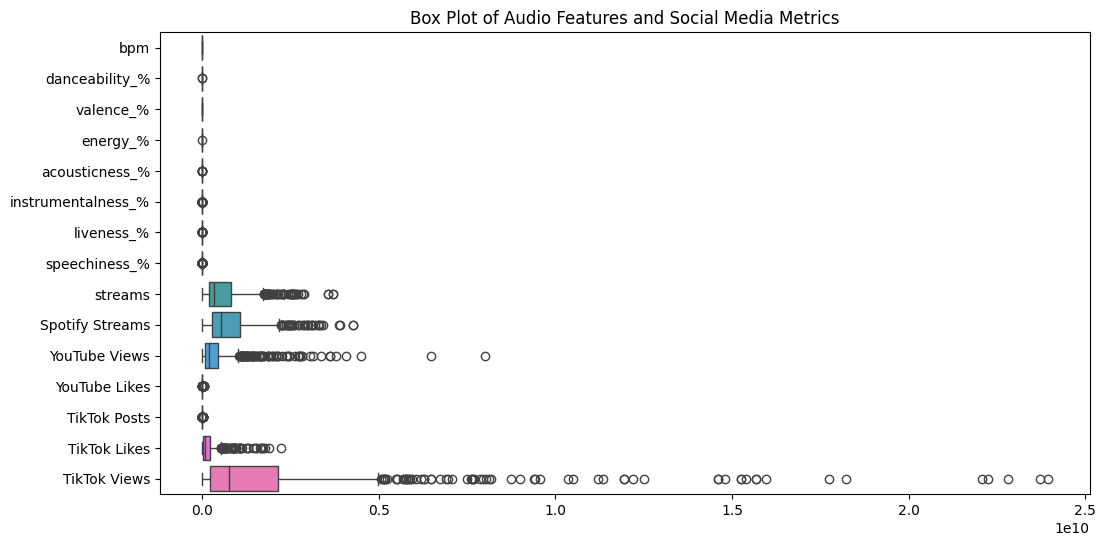

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[relevant_columns], orient='h')
plt.title("Box Plot of Audio Features and Social Media Metrics")
plt.show()

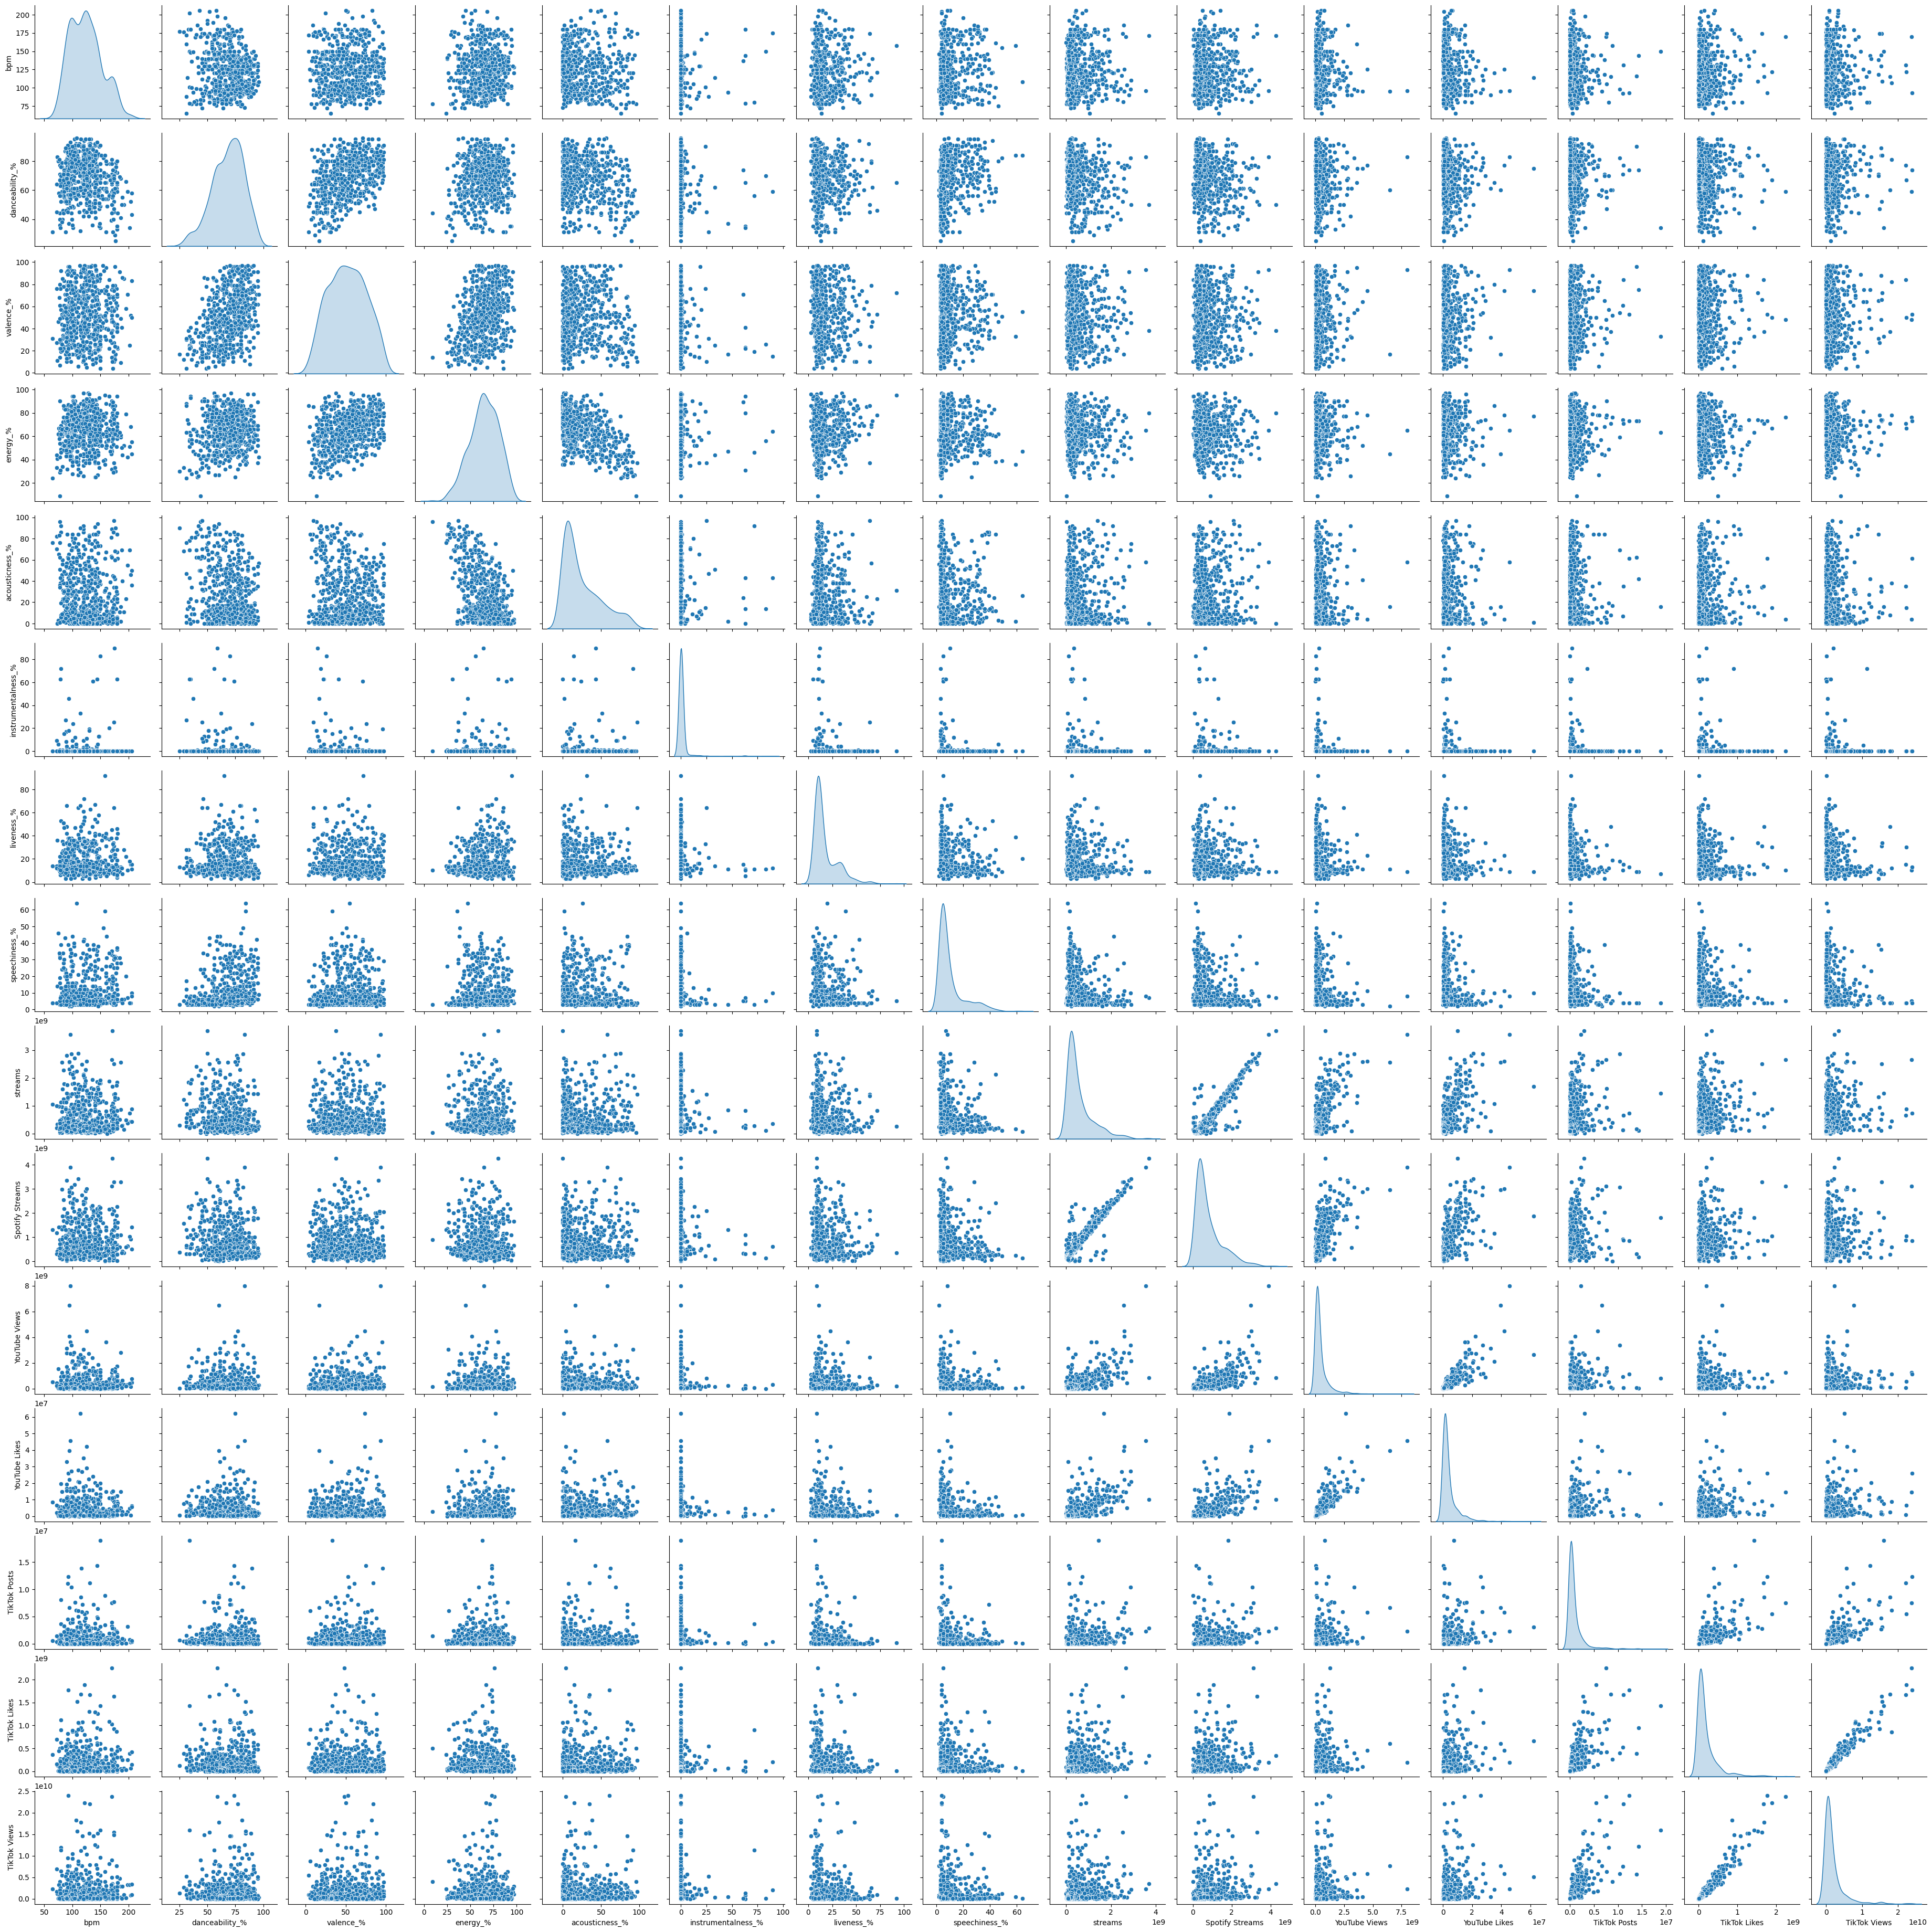

In [14]:
sns.pairplot(data[relevant_columns].dropna(), diag_kind='kde')
plt.show()

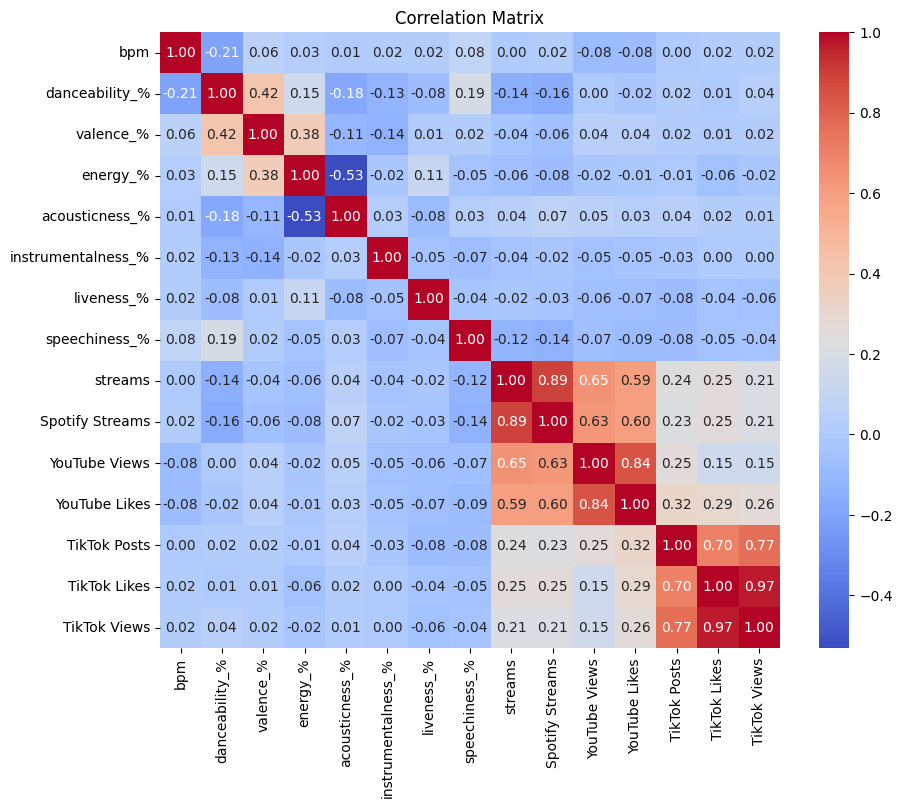

In [15]:
correlation_matrix = data[relevant_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_splitg   
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
audio_features = [
    "bpm", "danceability_%", "valence_%", "energy_%",
    "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"
]

social_media_metrics = [
    "streams", "Spotify Streams", "YouTube Views", "YouTube Likes",
    "TikTok Posts", "TikTok Likes", "TikTok Views"
]

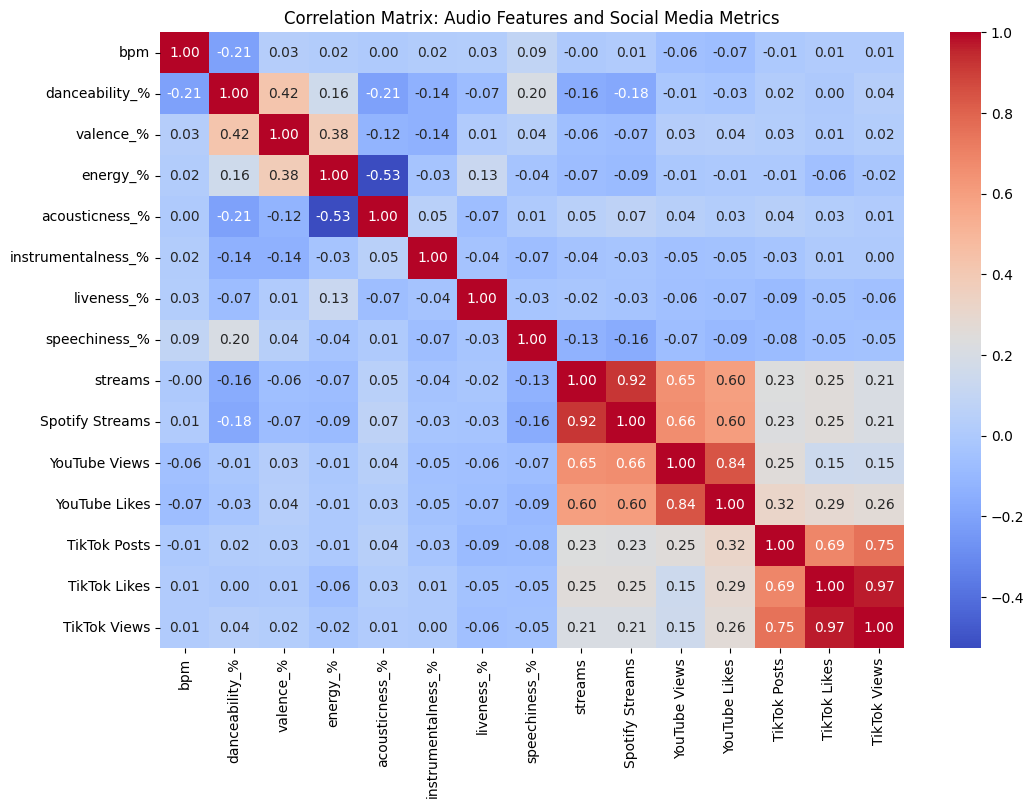

In [21]:
correlation_data = data[audio_features + social_media_metrics].dropna()
correlation_matrix = correlation_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Audio Features and Social Media Metrics")
plt.show()

In [22]:
# Define dependent variable (target) and independent variables (predictors)
X = data[["Spotify Streams", "YouTube Views", "TikTok Likes"]].dropna()  # Predictor variables
y = data["streams"].dropna()  # Target variable

# Ensure X and y are aligned
X, y = X.align(y, join='inner', axis=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = reg_model.predict(X_test)

# Evaluate the regression model
print("Regression Coefficients:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Regression Coefficients: [0.72239355 0.09099426 0.04344952]
Intercept: -29379675.922033668
Mean Squared Error: 3.0245651733555628e+16
R-squared: 0.9150125518559086


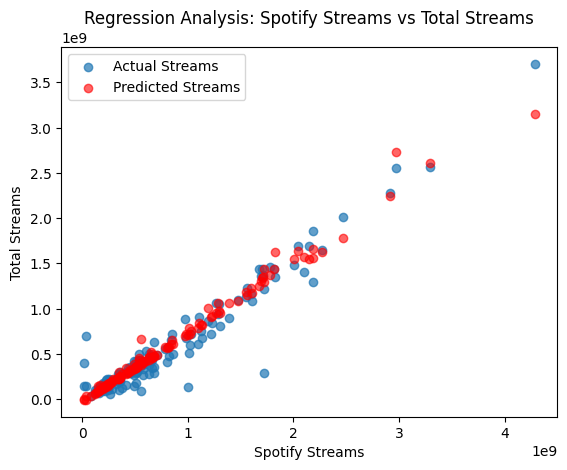

In [23]:
# Scatter plot for one of the predictors vs the target
plt.scatter(X_test["Spotify Streams"], y_test, label="Actual Streams", alpha=0.7)
plt.scatter(X_test["Spotify Streams"], y_pred, label="Predicted Streams", color='red', alpha=0.6)
plt.title("Regression Analysis: Spotify Streams vs Total Streams")
plt.xlabel("Spotify Streams")
plt.ylabel("Total Streams")
plt.legend()
plt.show()


In [1]:
import numpy as np
from scipy import stats
import pandas as pd

# Create dataframe with the results
data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Support Vector Machine', 
              'Fully Connected Neural Network'],
    'Audio_Only': [58.65, 57.89, 61.43, 61.94],
    'Audio_Social': [81.29, 80.45, 77.44, 81.26],
    'MSE_Audio': [0.4135, 0.4211, 0.3835, 0.3806],
    'MSE_Combined': [0.1880, 0.1955, 0.2226, 0.1874]
}

df = pd.DataFrame(data)

def perform_statistical_analysis(df):
    # Calculate improvements
    df['Accuracy_Improvement'] = df['Audio_Social'] - df['Audio_Only']
    df['MSE_Improvement'] = df['MSE_Audio'] - df['MSE_Combined']
    
    # Perform paired t-test for accuracy
    t_stat_acc, p_value_acc = stats.ttest_rel(df['Audio_Social'], df['Audio_Only'])
    
    # Perform paired t-test for MSE
    t_stat_mse, p_value_mse = stats.ttest_rel(df['MSE_Audio'], df['MSE_Combined'])
    
    # Calculate effect sizes (Cohen's d)
    def cohens_d(group1, group2):
        diff = group1 - group2
        n = len(group1)
        s = np.sqrt(((n-1) * np.var(group1, ddof=1) + 
                     (n-1) * np.var(group2, ddof=1)) / (2*n - 2))
        return np.mean(diff) / s
    
    d_acc = cohens_d(df['Audio_Social'], df['Audio_Only'])
    d_mse = cohens_d(df['MSE_Audio'], df['MSE_Combined'])
    
    # Print results
    print("\nStatistical Analysis Results:")
    print("-" * 50)
    
    print("\nAccuracy Analysis:")
    print(f"Mean Improvement: {df['Accuracy_Improvement'].mean():.2f}%")
    print(f"T-statistic: {t_stat_acc:.4f}")
    print(f"P-value: {p_value_acc:.4f}")
    print(f"Cohen's d: {d_acc:.4f}")
    
    print("\nMSE Analysis:")
    print(f"Mean MSE Reduction: {df['MSE_Improvement'].mean():.4f}")
    print(f"T-statistic: {t_stat_mse:.4f}")
    print(f"P-value: {p_value_mse:.4f}")
    print(f"Cohen's d: {d_mse:.4f}")
    
    # Print detailed improvements by model
    print("\nModel-wise Improvements:")
    print("-" * 50)
    for i, row in df.iterrows():
        print(f"\n{row['Model']}:")
        print(f"Accuracy: {row['Accuracy_Improvement']:.2f}% improvement")
        print(f"MSE: {row['MSE_Improvement']:.4f} reduction")

# Run the analysis
perform_statistical_analysis(df)


Statistical Analysis Results:
--------------------------------------------------

Accuracy Analysis:
Mean Improvement: 20.13%
T-statistic: 12.7680
P-value: 0.0010
Cohen's d: 10.5042

MSE Analysis:
Mean MSE Reduction: 0.2013
T-statistic: 13.0076
P-value: 0.0010
Cohen's d: 10.7629

Model-wise Improvements:
--------------------------------------------------

Random Forest:
Accuracy: 22.64% improvement
MSE: 0.2255 reduction

Gradient Boosting:
Accuracy: 22.56% improvement
MSE: 0.2256 reduction

Support Vector Machine:
Accuracy: 16.01% improvement
MSE: 0.1609 reduction

Fully Connected Neural Network:
Accuracy: 19.32% improvement
MSE: 0.1932 reduction
